In [16]:
%matplotlib inline

import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import randint, uniform
from sklearn import linear_model, preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import (RandomForestRegressor)
from sklearn.linear_model import Lasso, LogisticRegression, Ridge
from sklearn.metrics import (classification_report, mean_absolute_error, r2_score)
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV,
                                     train_test_split)
from sklearn.preprocessing import (LabelEncoder, MinMaxScaler, OneHotEncoder,
                                   PolynomialFeatures, RobustScaler,
                                   StandardScaler)
from sklearn.svm import SVC

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [17]:
# import data
dataset_og = pd.read_csv('Data\Measurements-Transformed')
# kopie maken indien we iets van de originele data nodig hebben
dataset = dataset_og.copy()
dataset.head(5)

,ID,Sex,Measurement_Age,Add,Sph-Far-R,Cyl-Far-R,Axis-Far-R,Sph-Close-R,Cyl-Close-R,Axis-Close-R,Sph-Far-L,Cyl-Far-L,Axis-Far-L,Sph-Close-L,Cyl-Close-L,Axis-Close-L
0,371435.0,0.0,21118.0,0.0,-1.75,0.50,55.0,-2.25,1.0,55.0,-1.75,1.00,110.0,-1.25,0.5,110.0
1,371435.0,0.0,20245.0,0.0,-1.75,0.50,65.0,0.00,0.0,0.0,-1.25,0.50,110.0,0.00,0.0,0.0
2,371435.0,0.0,18099.0,0.0,-1.50,0.50,65.0,0.00,0.0,0.0,-1.00,0.50,110.0,0.00,0.0,0.0
3,402916.0,1.0,13825.0,0.0,-3.50,1.50,180.0,-3.50,1.5,180.0,-3.00,1.50,180.0,-3.00,1.5,180.0
4,402916.0,1.0,9653.0,0.0,-2.00,0.75,175.0,0.00,0.0,0.0,-2.00,0.75,180.0,0.00,0.0,0.0


In [3]:
dataset = dataset[[ 'Measurement_Age', 'Add', 'Sph-Far-R', 'Cyl-Far-R', 'Axis-Far-R', 'Sph-Close-R', 'Cyl-Close-R', 'Axis-Close-R', 'Sph-Far-L', 'Cyl-Far-L', 'Axis-Far-L', 'Sph-Close-L', 'Cyl-Close-L', 'Axis-Close-L']]
dataset = dataset.set_index('Measurement_Age')
dataset.head(2)

,Add,Sph-Far-R,Cyl-Far-R,Axis-Far-R,Sph-Close-R,Cyl-Close-R,Axis-Close-R,Sph-Far-L,Cyl-Far-L,Axis-Far-L,Sph-Close-L,Cyl-Close-L,Axis-Close-L
Measurement_Age,,,,,,,,,,,,,
21118.0,0.0,-1.75,0.5,55.0,-2.25,1.0,55.0,-1.75,1.0,110.0,-1.25,0.5,110.0
20245.0,0.0,-1.75,0.5,65.0,0.00,0.0,0.0,-1.25,0.5,110.0,0.00,0.0,0.0


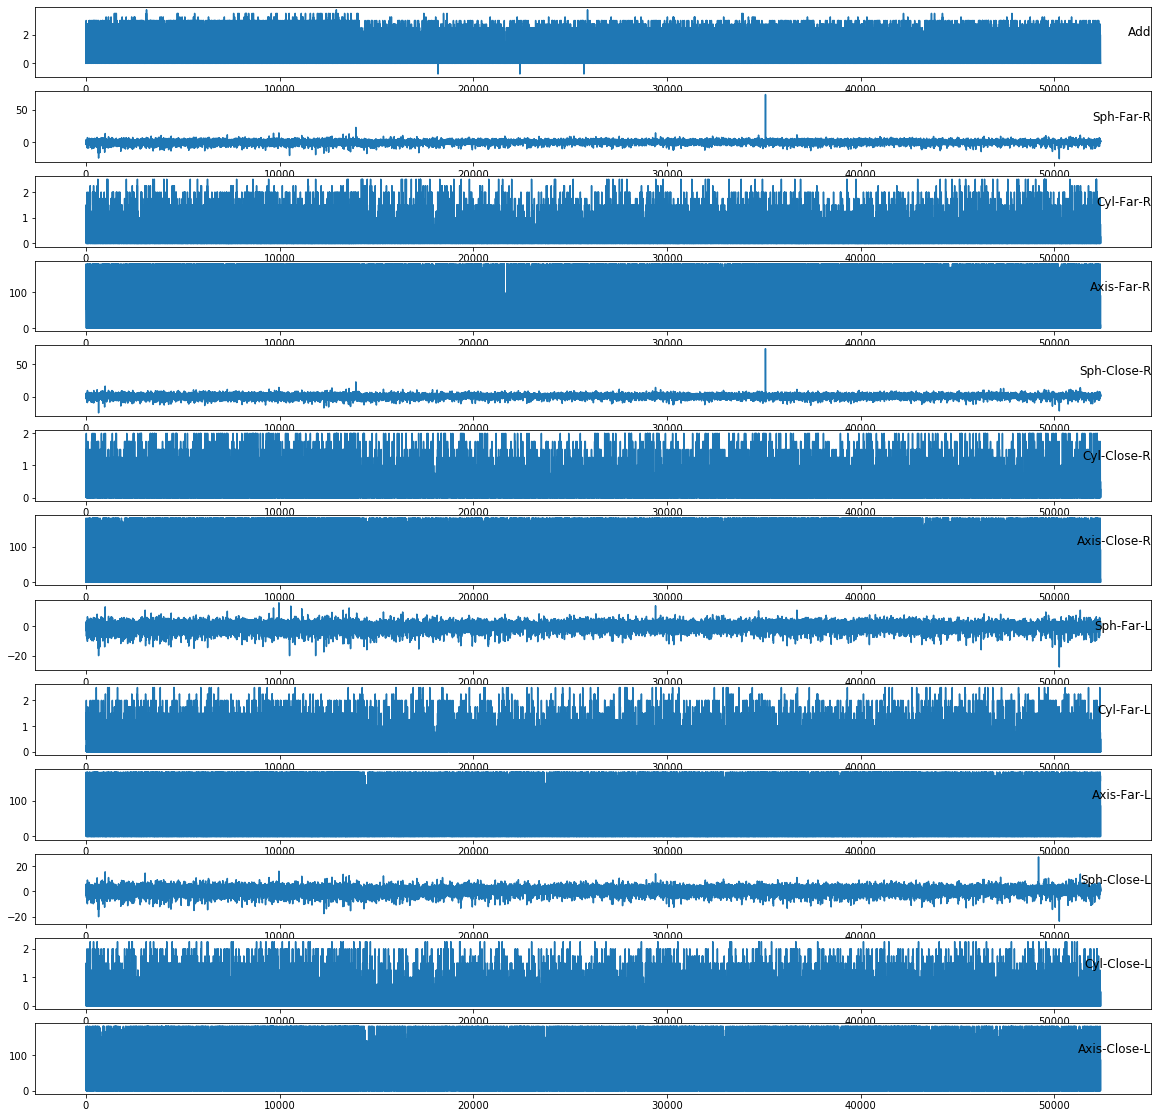

In [4]:
from matplotlib import pyplot
values = dataset.values
groups = [0,1,2,3,4,5,6,7,8,9,10,11,12]
i = 1
pyplot.figure(figsize=(20,20))
for group in groups:
    pyplot.subplot(len(groups),1,i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [22]:
# dataset_og.head()
dataset2 = dataset[dataset_og['ID']==371435.0]
dataset2.head(20)

,ID,Sex,Measurement_Age,Add,Sph-Far-R,Cyl-Far-R,Axis-Far-R,Sph-Close-R,Cyl-Close-R,Axis-Close-R,Sph-Far-L,Cyl-Far-L,Axis-Far-L,Sph-Close-L,Cyl-Close-L,Axis-Close-L
0,371435.0,0.0,21118.0,0.0,-1.75,0.5,55.0,-2.25,1.0,55.0,-1.75,1.0,110.0,-1.25,0.5,110.0
1,371435.0,0.0,20245.0,0.0,-1.75,0.5,65.0,0.00,0.0,0.0,-1.25,0.5,110.0,0.00,0.0,0.0
2,371435.0,0.0,18099.0,0.0,-1.50,0.5,65.0,0.00,0.0,0.0,-1.00,0.5,110.0,0.00,0.0,0.0


In [23]:
dataset2 = dataset2[[ 'Measurement_Age', 'Add', 'Sph-Far-R', 'Cyl-Far-R', 'Axis-Far-R', 'Sph-Close-R', 'Cyl-Close-R', 'Axis-Close-R', 'Sph-Far-L', 'Cyl-Far-L', 'Axis-Far-L', 'Sph-Close-L', 'Cyl-Close-L', 'Axis-Close-L']]
dataset2 = dataset2.set_index('Measurement_Age')
dataset2.head()

,Add,Sph-Far-R,Cyl-Far-R,Axis-Far-R,Sph-Close-R,Cyl-Close-R,Axis-Close-R,Sph-Far-L,Cyl-Far-L,Axis-Far-L,Sph-Close-L,Cyl-Close-L,Axis-Close-L
Measurement_Age,,,,,,,,,,,,,
21118.0,0.0,-1.75,0.5,55.0,-2.25,1.0,55.0,-1.75,1.0,110.0,-1.25,0.5,110.0
20245.0,0.0,-1.75,0.5,65.0,0.00,0.0,0.0,-1.25,0.5,110.0,0.00,0.0,0.0
18099.0,0.0,-1.50,0.5,65.0,0.00,0.0,0.0,-1.00,0.5,110.0,0.00,0.0,0.0


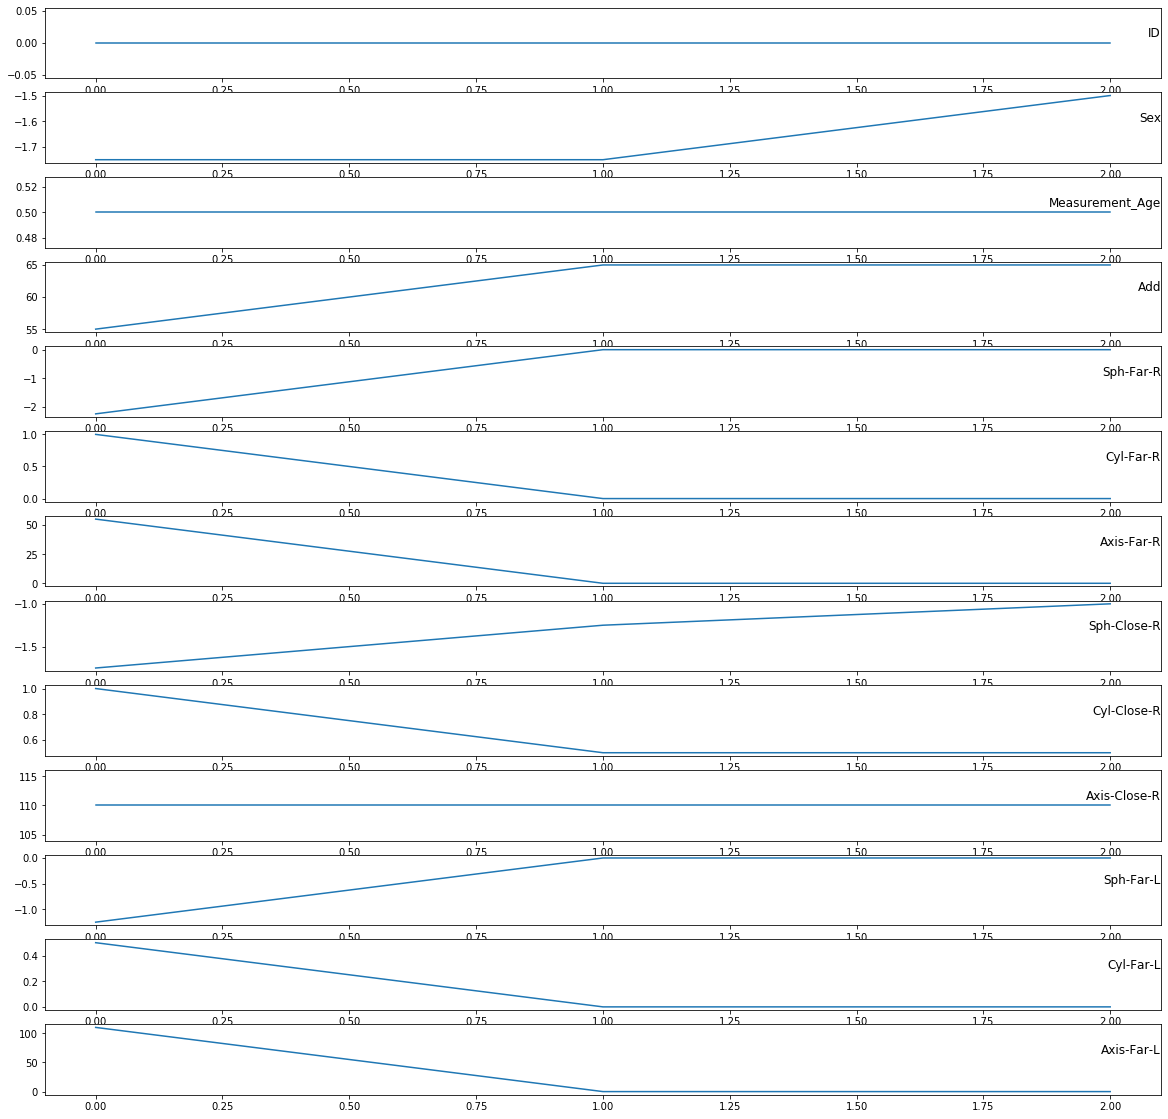

In [24]:
from matplotlib import pyplot
values = dataset2.values
groups = [0,1,2,3,4,5,6,7,8,9,10,11,12]
i = 1
pyplot.figure(figsize=(20,20))
for group in groups:
    pyplot.subplot(len(groups),1,i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()